<a href="https://colab.research.google.com/github/jpmvbastos/AppliedEconometrics3/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1







In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set_style('darkgrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson
from statsmodels.base.model import GenericLikelihoodModel

In [ ]:
df = pd.read_excel('data_1.xlsx')

FileNotFoundError: ignored

## 2) Simulate a mixture of two normal populations

Assumptions: 

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$

$ x_1 \sim N(\mu_1, \sigma^2_1)$

$ x_2 \sim N(\mu_2, \sigma^2_2)$ 

In [ ]:
# Estipulate the parameters of the population
n=1000

#Generate x1
mu1 = 2
s1 = 1
x1 = np.random.normal(mu1,s1,n)

#Generate x2
mu2 = 15
s2 = 4
x2 = np.random.normal(mu2, s2, n)

#Create X matrix

X = np.array([np.ones(n), x1 , x2]).T
X = pd.DataFrame(X)
X


,0,1,2
0,1.0,1.255247,16.576370
1,1.0,4.082118,18.195143
2,1.0,1.565613,10.042071
3,1.0,2.883446,19.451961
4,1.0,3.335945,17.024418
...,...,...,...
995,1.0,0.517967,15.450027
996,1.0,2.499153,15.947030
997,1.0,1.686185,18.980945
998,1.0,1.297425,14.300259


In [ ]:
#Establishing that we have a 50/50 mixture
p = 0.5  

R = np.random.random(n)

ind = pd.Series(R < 0.3)
ind = np.asarray(ind.replace({True:1,False:0}))
n_p = sum(ind)

## 3) Monte Carlo Simulation

Simulate 1000 observations of a variable $income$ and a variable $gender$ and use these covariates to simulate 1000 observations of the number of credit card frauds using the Poisson distribution with $\lambda_i = exp(x_i'\beta)$

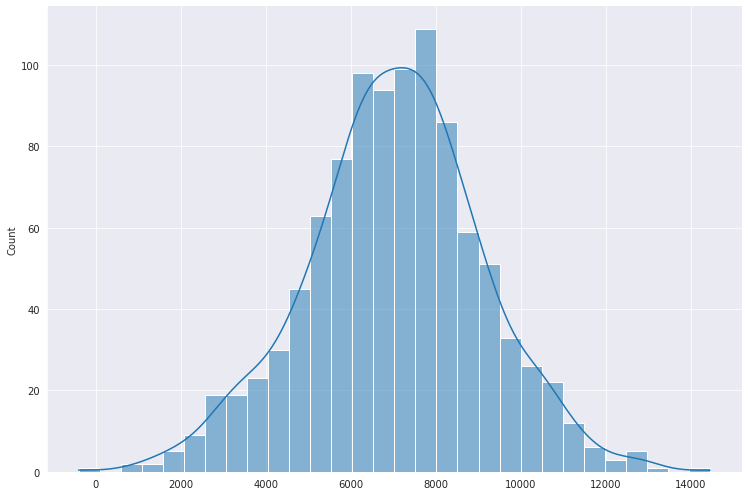

In [ ]:
# Assume mean monthly income is $7000 with a variance of $2000
income = np.random.normal(7000,2000,n)
sns.displot(income, kde=True, height=7, aspect=1.5)

In [ ]:
# Assume 55% of credit card owners are women
female = np.random.binomial(1, 0.55, 1000) 
print("In our sample, we have " + str(np.sum(female)) + " women.")

In our sample, we have 530 women.


Let's assume that the number of credit card frauds is given by:

$Fraud = exp(\beta_0 + \beta_1Income + \beta_2Female)$

where $\beta_0=5$, $\beta_1 = -0.025$ and $\beta_2 = -0.05$

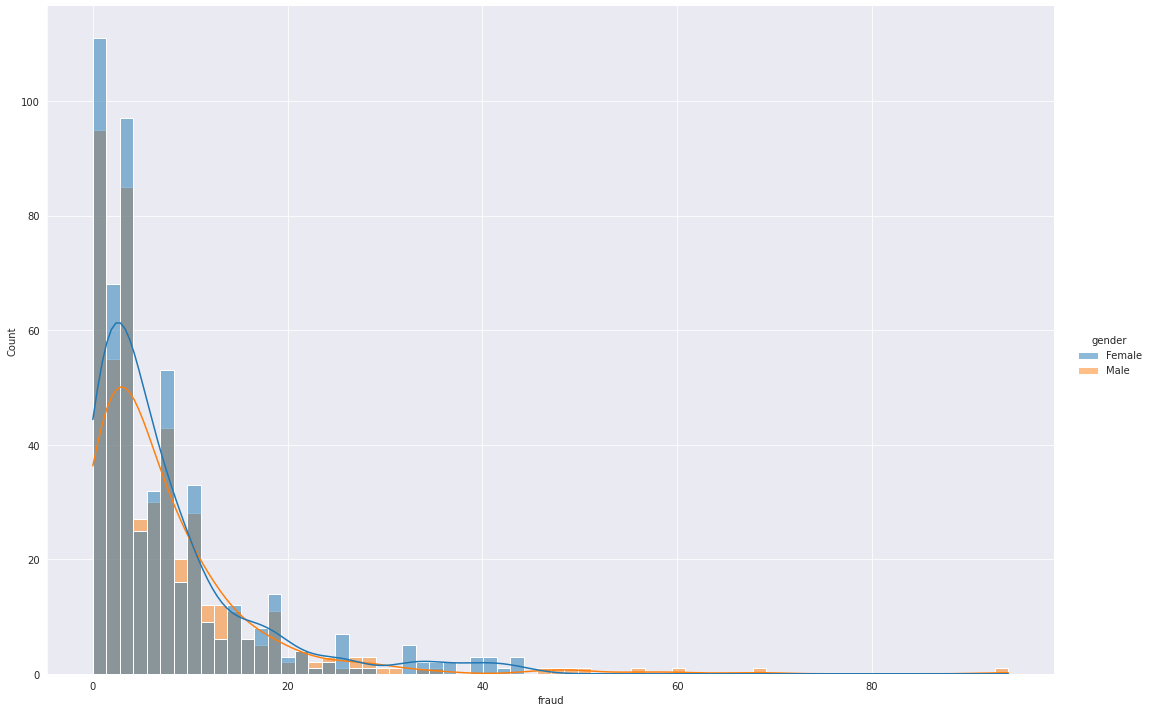

In [ ]:
# Generate X matrix
X = X = np.array([np.ones(n), income , female]).T
X = pd.DataFrame(X, columns=['cons','income', 'female'])

# Apply data generating process
Xb = 5 + -0.0005*income -0.025*female

# Create Lambda
l = np.exp(Xb)

fraud = np.random.poisson(l,n)
y = pd.Series(fraud)
data = pd.concat([y, X], axis=1).rename(columns={0:'fraud','female':'gender'})
data.gender = data.gender.replace({1:'Female', 0:'Male'})

sns.displot(data=data, x='fraud', hue='gender', kde=True, height=10, aspect=1.5)


### a) Assuming linearity, estimate the $\beta$ parameters

In [ ]:
#Generate 
sm.OLS(fraud,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     728.9
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          8.46e-196
Time:                        18:42:03   Log-Likelihood:                -3157.9
No. Observations:                1000   AIC:                             6322.
Df Residuals:                     997   BIC:                             6337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons          31.1670      0.677     46.044      0.000      29.839      32.495
income        -0.0035   9.04e-05    -38.179      0.000      -0.004      -0.003
female         0.1437      0.361      0.398      0.691      -0.565       0.853
==============================================================================
Omnibus:                      802.917   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28013.637
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      28.028   Cond. No.                     2.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

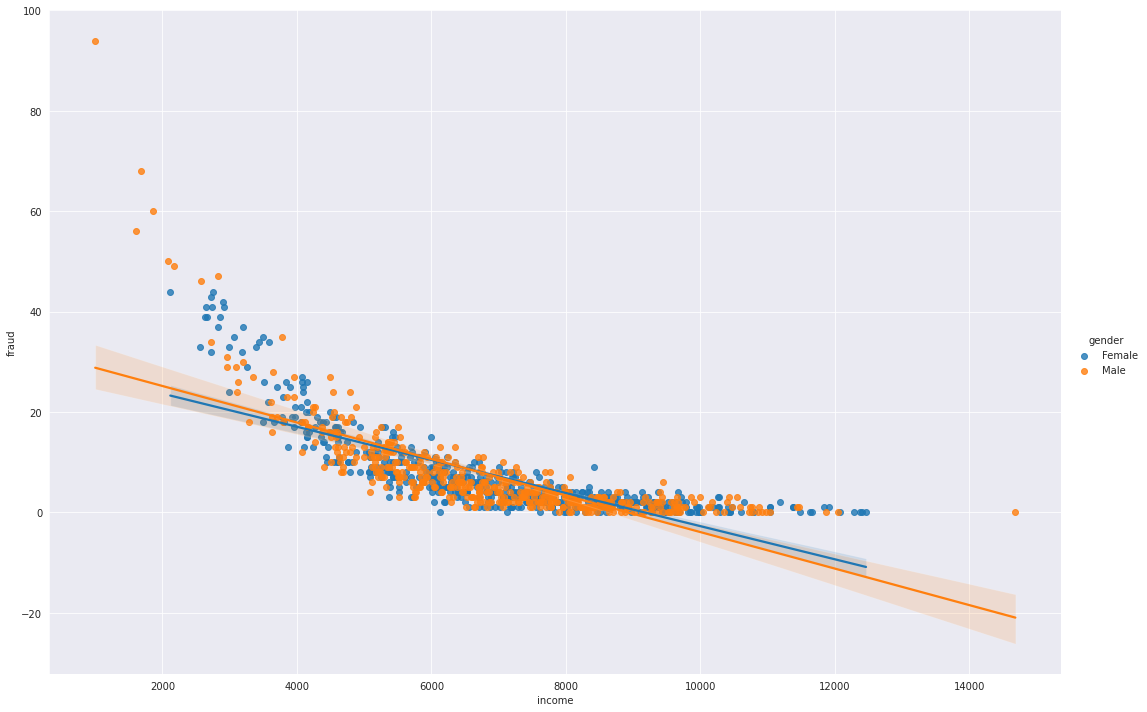

In [ ]:
sns.lmplot(x='income', y='fraud', hue='gender', data=data, height=10, aspect=1.5)

### b) Use Maximum Likelihood to estimate the β parameters

In [ ]:
Poisson(fraud, X).fit().summary()

Optimization terminated successfully.
         Current function value: 2.148991
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                        Poisson   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.6116
Time:                        18:42:45   Log-Likelihood:                -2149.0
converged:                       True   LL-Null:                       -5533.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cons           5.0125      0.036    138.431      0.000       4.941       5.083
income        -0.0005   6.37e-06    -79.493      0.000      -0.001      -0.000
female         0.0014      0.023      0.059      0.953      -0.045       0.047
==============================================================================
"""

### c) What do you conclude
 

 It can be seen that the Maximum Likelihood estimation does a much better job in finding coefficients that approximate the true population parameters. The intercept and $\beta_1$ are nearly identical to the true values.

The linear regression, on the other hand, has to overestimate the intercept to account for outliers generated by the non-linear effect. This generates bias in the estimates, especially towards the tails of the distribution, as it can be seen in the regression plot (which is a mere approximation of our linear model, since the female dummy is an intercept shifter in our model, but is represented as a slope shifter in the plot). 

Evidently, we should utilize the Maximum Likelihood Estimator.